### Abstract

* 이미지에서 일반적인 GAN연구는 잘 진행되고 있지만, GAN을 활용하여 text and image modeling을 수행하는 것이 목적


* 대상의 visual concepts를 픽셀로 변환

### Introduction

* 사람이 작성한 한 문장의 description을 이미지 픽셀로 변환하는 것에 관심이 있음
   * 획득한 visual description로부터 이미지를 생성하는 것은 해결되지 못한 과제
   
   
* 자연어는 물체를 설명하는데 있어 일반적이고 유연한 추론을 제공함
   * 이상적으로 text description이 판별 능력(discriminability)을 향상 시킬 것
   
   
* 최근 텍스트에 대한 CNN, RNN이 매우 discrimnative하고 일반화가 가능한 representation을 학습한 다는 것이 밝혀짐
   * words to image pixel mapping을 시도
   
   
* 이를 위해서는 두 가지 문제를 해결해야 함
   1. 시각적으로 중요한 디테일을 포착하는 text feature 표현을 학습해야 함
   2. 위의 feature를 사용하여 실제 같은 이미지를 생성해야 함
   
 => 딥러닝은 이 두 가지 문제들을 잘 해결하고 있으나, 이를 한 번에 해결하는 것이 목표
 
 
* 문제점
   * text description을 조건으로 가지는 image의 분포가 굉장히 높음 multimodality를 가짐 (텍스트 설명에 부합하는 이미지가 굉장히 많음))
      * image to text문제도 이러한 어려움이 있으나, 문장의 단어는 순서대로 sequential하게 생성되고, 이미지와 이전 시점까지의 토큰들을 조건으로 그 다음의 토큰을 예측하기 때문에 덜 한 측면이 있음 
     
  
   * conditional modality : conditioning both G and D on side information
   
   


* 사람이 쓴 문장을 이미지로 변환하는 모델의 설계
   * 텍스트에서 중요한 시각적 요소들을 학습
   * 이를 기반으로 실제같은 이미지를 합성

### Related Work

* Multimodal Prediction 문제


* 여러 modal에서 공유되는 representation 학습
   * predict missing data in one modality conditioned on another


* Deep Convolutional Decoder Network
   * 이미지를 생성하는 과정은 decoder에 해당, DCN을 기반으로 실제 같은 이미지를 합성하는 연구
   * GAN에서는 고해상도의 이미지를 생성하고, 통제된 생성을 가능케 함  ex) conditioned on class labels
   
   

* 이미지의 class label을 기반으로 GAN을 학습 시켜 이미지를 생성
   * class label 대신 text description을 기반으로 GAN 학습
   
   
* 본 연구는 일반적인 conditional GAN과 달리 class label이 아닌 text description에 conditioning
* 생성자에 manifold interpolation regularizer를 적용시켜 생성 이미지의 품질을 높임
   
   

=> character level text encoder와 class conditional GAN을 활용하여 텍스트 기반 이미지 생성을 가능케 함

### Background

#### Deep symmetri structured joint embedding

* 텍스트를 인코딩하여 얻는 임베딩 벡터와 이미지를 인코딩하여 얻는 임베딩 벡터 간의 차이를 최소화 하도록

* deep convolutional & recurrent text encoder를 사용하여 주어진 text description으로부터 시각적으로 분별 가능한 벡터 표현을 학습
    * 인코더는 image와의 correspondence function f_t을 학습함
    
    
* f_t는 아래의 structure loss를 최적화 하는 방식으로 학습됨

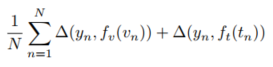


* delta : 0-1 loss  /  v : images  /  t : corresponding text descriptions  /  y : class label


* 이미지와 텍스트를 서로 잘 매칭하도록 loss값을 최소화


*classifer*
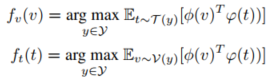



* image encoder(DCN)  /  text encoder(character level CNN or LSTM)  /  T(y) : set of text descriptions of class y  /  V(y)


* 특정 이미지의 인코딩 벡터와 모든 클래스에 속하는 텍스트들(y~T(y))에 대해 인코딩된 벡터와의 내적을 계산하고, 그것을 최대화 하는(유사도가 높은) y를 찾음, 가장 적절한 텍스트를 이끌어내는 분류기


=> 특정 클래스에 대응되는 이미지에 대해 텍스트 인코딩은 다른 클래스들보다 높은 compatibility score를 가져야 함

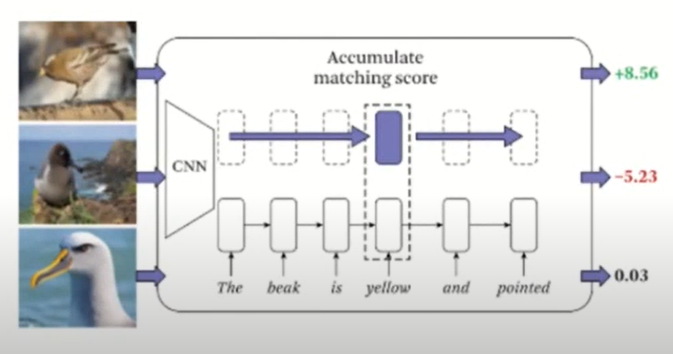

### Method

* Convolutional RNN으로 인코딩된 text feature를 활용, DC-GAN을통해 이미지를 합성

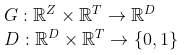

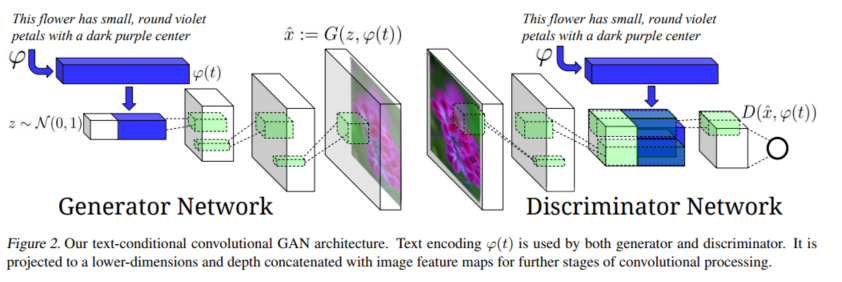

**생성자**

1. 노이즈를 샘플링하고 인코딩된 text description을 FCN을 이용하여 보다 작은 차원으로 축소
2. 노이즈와 차원 축소된 텍스트 인코딩 벡터를 concatenate
3. 생성자의 deconvolutional network에 입력으로 넣어 feed forward

* 생성 이미지는 쿼리 텍스트와 노이즈 샘플에 conditioned된 생성자의 feed forward inference

**판별자**

1. stride 2 convolution 적용(+batch normalization)  
2. 4x4 conv가 되면 생성자와는 독립적으로 인코더에 의해 임베딩된 텍스트 벡터에 대한 차원 축소를 실시(FCN), concat
3. final score계산하여 분류

#### Matching aware discriminator (GAN-CLS)

* conditional GAN을 학습시키는 가장 나이브한 방식은 (text, image)페어를 joint observation으로서 판별자가 판별하도록 하는 것


* 학습 초기에는 생성자의 생성 능력이 매우 부족하기 때문에 판별자는 condition을 굳이 따질 필요가 없다고 판단하기 때문에, G가 일단 그럴듯한 이미지를 생성한 후에 이것이 conditioning information과 align되는 지를 판별해야 한다


* 판별자는 두 가지 입력을 받음
   1. real image + matching text
   2. synthetic image + arbitrary text
 
 
* 판별자는 두 가지 오류를 해결해야 함
   1. unrealistic한 이미지가 생성되는 것 (for any text)
   2. 그럴듯한 이미지이지만 conditioning information과 mismatch된 이미지 

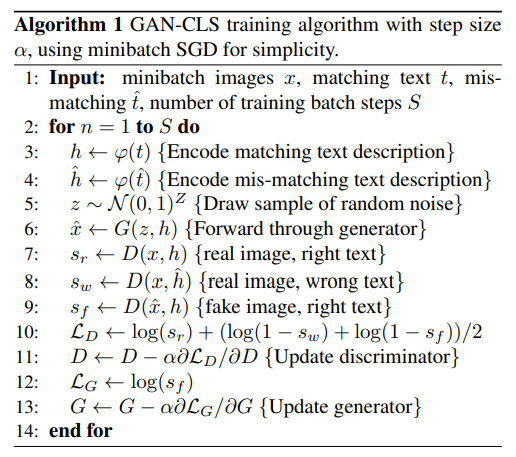

#### Learning with manifold interpolation (GAN-INT)

* 딥러닝 네트워크는 data manifold 근처에 있는 임베딩 페어들에 대해 interpolation을 수행하여 표현을 학습함


* 위의 컨셉을 이용해 대용량의 additonal text embedding 생성을 위해 학습 데이터 임베딩들 사이를 interpolation하며 학습을 진행
   * interpolation으로 생성된 텍스트 임베딩은 사람이 직접 작성하는 텍스트가 아니기 때문에 labeling cost x
   * 비슷한 이미지에 대해 많은 텍스트 임베딩을 생성하고, 공유하는 것들을 찾아낼 수 있기 때문에 보다 그럴듯한 이미지 생성에 도움이 됨
   
   
   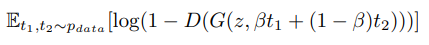
   
   
* B는 주로 0.5 사용, 텍스트 임베딩 t1, t2에 대한 interpolation => interpolation을 통해 생성된 텍스트 임베딩 t3은 매칭되는 real image가 없기 때문에, 판별자가 t3을 받으면 정답으로 fake를 출력해야 함
   * D가 이러한 과정을 잘 수행하면 training point들 사이의 data manifold의 차이를 메울 수 있음
   * 훈련 데이터는 유한 개이므로 텍스트 임베딩 역시 유한 개의 point들 => 텍스트 임베딩 사이의 gap을 메울 수 있음

#### Inverting the generator for style transfer

* 텍스트 인코딩이 이미지의 내용(꽃의 모양, 색깔 등)을 담아내기 때문에, 실제 같은 이미지 생성을 위해서는 노이즈 샘플 z가 style factor(바탕 색, 포즈)들을 담아내야 함


* 쿼리 이미지의 스타일을 특정한 text description으로 전환시키기 위해서는 G를 x^에서 z로 거꾸로 흐르게 훈련 시킴 

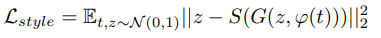
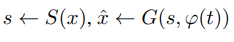


* S : style encoder

### Experiments

#### Disentangling style and content

* content는 새 자체의 시각적 특징 (모양, 크기, 몸의 색깔), style은 이미지의 다른 요소들 (배경, 새 자체의 pose)
   * 텍스트 임베딩은 content information을 담당, style 관여 x
   * 실제 같은 이미지 생성을 위해서는 z를 잘 학습해야 함 (style variation을 잘 설명할 수 있도록)
   * 같은 style을 가지는 이미지들 사이의 유사성이 높아야 함

#### pose and background style transfer

* style encoder를 통해 분리해낸 style을 다른 이미지를 생성할 때 transfer할 수 있음

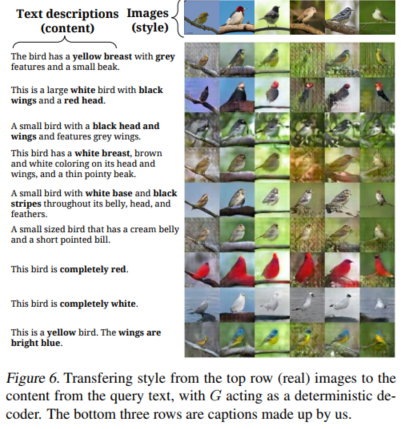

#### sentence inerpolation

* 텍스트가 변경되어도 noise 샘플 z는 고정되기 때문에 새의 색만 바뀌게 됨
* interpolation을 통해 새가 파란색에서 빨간색으로 변하는 현상을 반영할 수 있음

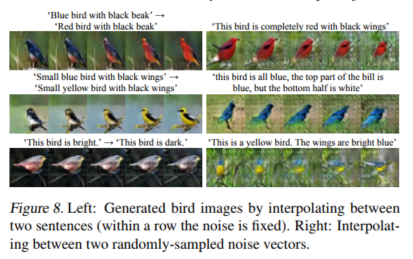